In [1]:
import json

# 读取文件内容
file_path = 'pull_requests.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    file_content = file.read()

# 修正格式：在字典之间插入逗号，并将内容包裹成 JSON 数组
fixed_content = file_content.replace("}\n{", "},\n{")

# 将内容包裹在方括号中，形成 JSON 数组
fixed_content = "[" + fixed_content + "]"

# 尝试将修正后的内容加载为 JSON
try:
    data = json.loads(fixed_content)
    print("数据加载成功：", data[0])
except json.JSONDecodeError as e:
    print(f"加载失败，错误信息：{e}")


数据加载成功： {'项目名称': 'optimizely/python-sdk', '项目star': [], '项目网址': 'https://github.com/optimizely/python-sdk/pull/226', 'pr的文本描述': 'Summary\r\n-------\r\nAdds support for get_optimizely_config public API. \r\n\r\nTest plan\r\n---------\r\n- Tested manually with FSC OptimizelyConfig tests. \r\n- Added simple Unit tests in test_optimizely.py\r\n\r\nIssues\r\n------\r\n-  OASIS-5464\r\n', '变更的代码': [{'optimizely/optimizely.py': '@@ -1,4 +1,4 @@\n-# Copyright 2016-2019, Optimizely\n+# Copyright 2016-2020, Optimizely\n # Licensed under the Apache License, Version 2.0 (the "License");\n # you may not use this file except in compliance with the License.\n # You may obtain a copy of the License at\n@@ -25,6 +25,7 @@\n from .event_dispatcher import EventDispatcher as default_event_dispatcher\n from .helpers import enums, validator\n from .notification_center import NotificationCenter\n+from .optimizely_config import OptimizelyConfigService\n \n \n class Optimizely(object):\n@@ -733,3 +734,21 @@ def

In [8]:
data[0].keys()

dict_keys(['项目名称', '项目star', '项目网址', 'pr的文本描述', '变更的代码', '最后的完整代码'])

In [2]:
# 重构 JSON 格式
restructured_data = {}
for item in data:
    project_name = item['项目名称']
    if project_name not in restructured_data:
        restructured_data[project_name] = {
            '项目star': item['项目star'],
            '项目prs': []
        }
    pr_info = {
        'pr网址': item['项目网址'],
        'pr的文本描述': item['pr的文本描述'],
        '变更的代码': item['变更的代码'],
        '最后的完整代码': item['最后的完整代码']
    }
    restructured_data[project_name]['项目prs'].append(pr_info)
    

# 将重构后的数据保存为 JSON 文件
with open('data/restructed_part_pull_request.json', 'w') as json_file:
    json.dump(restructured_data, json_file, indent=4, ensure_ascii=False)

print("Restructured JSON content saved to restructed_pull_request.json")

Restructured JSON content saved to restructed_pull_request.json


In [1]:
import json

def print_json_keys(data, indent=0):
    """递归打印JSON对象的键结构"""
    if isinstance(data, dict):
        for key in data:
            print(' ' * indent + str(key))
            print_json_keys(data[key], indent + 4)
    elif isinstance(data, list):
        for item in data:
            print_json_keys(item, indent + 4)

# 读取JSON文件
json_file_path = "data/part_of_restructured_pr_filter2_page1.json"
with open(json_file_path, "r") as file:
    data = json.load(file)

# 打印JSON键结构
print_json_keys(data)

opentrons
    项目star
    项目prs
            项目网址
            pr的文本描述
            增加的代码
            删减的代码
            最后的完整代码
            项目网址
            pr的文本描述
            增加的代码
            删减的代码
            最后的完整代码


In [6]:
# 提取部分数据测试LLM判断是否存在test plan的能力
import json
with open ('data/restructed_pr_filter2_page1.json', 'r') as file:
    restructured_data_json = json.load(file)
restructured_data_json.keys()

part_of_data = {}

project_name, project_info = restructured_data_json.items().__iter__().__next__()
part_of_data[project_name] = {
    '项目star': project_info['项目star'],
    '项目prs': []
}
part_of_data[project_name]['项目prs'] = project_info['项目prs'][:2]
    
    
with open('data/part_of_restructured_pr_filter2_page1.json', 'w') as json_file:
    json.dump(part_of_data, json_file, indent=4, ensure_ascii=False)

part_of_data

{'opentrons': {'项目star': '431',
  '项目prs': [{'项目网址': 'https://github.com//Opentrons/opentrons/pull/13222',
    'pr的文本描述': "# Overview\r\n\r\nCloses RLAB-357\r\n\r\n# Test Plan\r\n\r\nJust unit- and integration tests should suffice for this since it's only updating definitions\r\n\r\n# Changelog\r\n\r\n- added `gripForce` and `gripHeightFromLabwareBottom` optional fields to labware schema and the supported, tested labware's definitions\r\n- updated labwareDefinition model & type dict signature\r\n- updated definition/schema verification tests\r\n\r\n# Review requests\r\n\r\n- make sure the grip force & height added are correct for the specific labware (tested values are in the sheet linked in the jira ticket above)\r\n- \r\n\r\n# Risk assessment\r\n\r\n<!--\r\nCarefully go over your pull request and look at the other parts of the codebase it may affect. Look for the possibility, even if you think it's small, that your change may affect some other part of the system - for instance, chang

In [1]:
import json

with open('data/restructed_pull_request.json', 'r') as file:
    pr_data = json.load(file)

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()


'/home/veteran/anaconda3/envs/multiAgent/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'

In [6]:
import matplotlib.font_manager as fm

# 列出系统中所有可用的字体
for font in fm.findSystemFonts():
    try:
        if 'Sim' in fm.FontProperties(fname=font).get_name():
            
            print(f'{font} : {fm.FontProperties(fname=font).get_name()}')
    except:
        pass

/home/veteran/.fonts/simsun.ttc : SimSun
/usr/share/fonts/MyFonts/simpo.ttf : Simplified Arabic
/usr/share/fonts/MyFonts/simpbdo.ttf : Simplified Arabic
/usr/share/fonts/MyFonts/simpfxo.ttf : Simplified Arabic Fixed
/usr/share/fonts/MyFonts/simsun.ttc : SimSun
/home/veteran/.fonts/simpo.ttf : Simplified Arabic
/home/veteran/.fonts/simsunb.ttf : SimSun-ExtB
/usr/share/fonts/MyFonts/simsunb.ttf : SimSun-ExtB
/home/veteran/.fonts/simpbdo.ttf : Simplified Arabic
/home/veteran/.fonts/simpfxo.ttf : Simplified Arabic Fixed
/usr/share/fonts/MyFonts/simhei.ttf : SimHei


数据总数: 521
最小值: 1
最大值: 1362
平均值: 7.75
中位数: 1
众数: 1


/tmp/ipykernel_13647/1176931029.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), ax=axes[1, 0], palette='viridis')


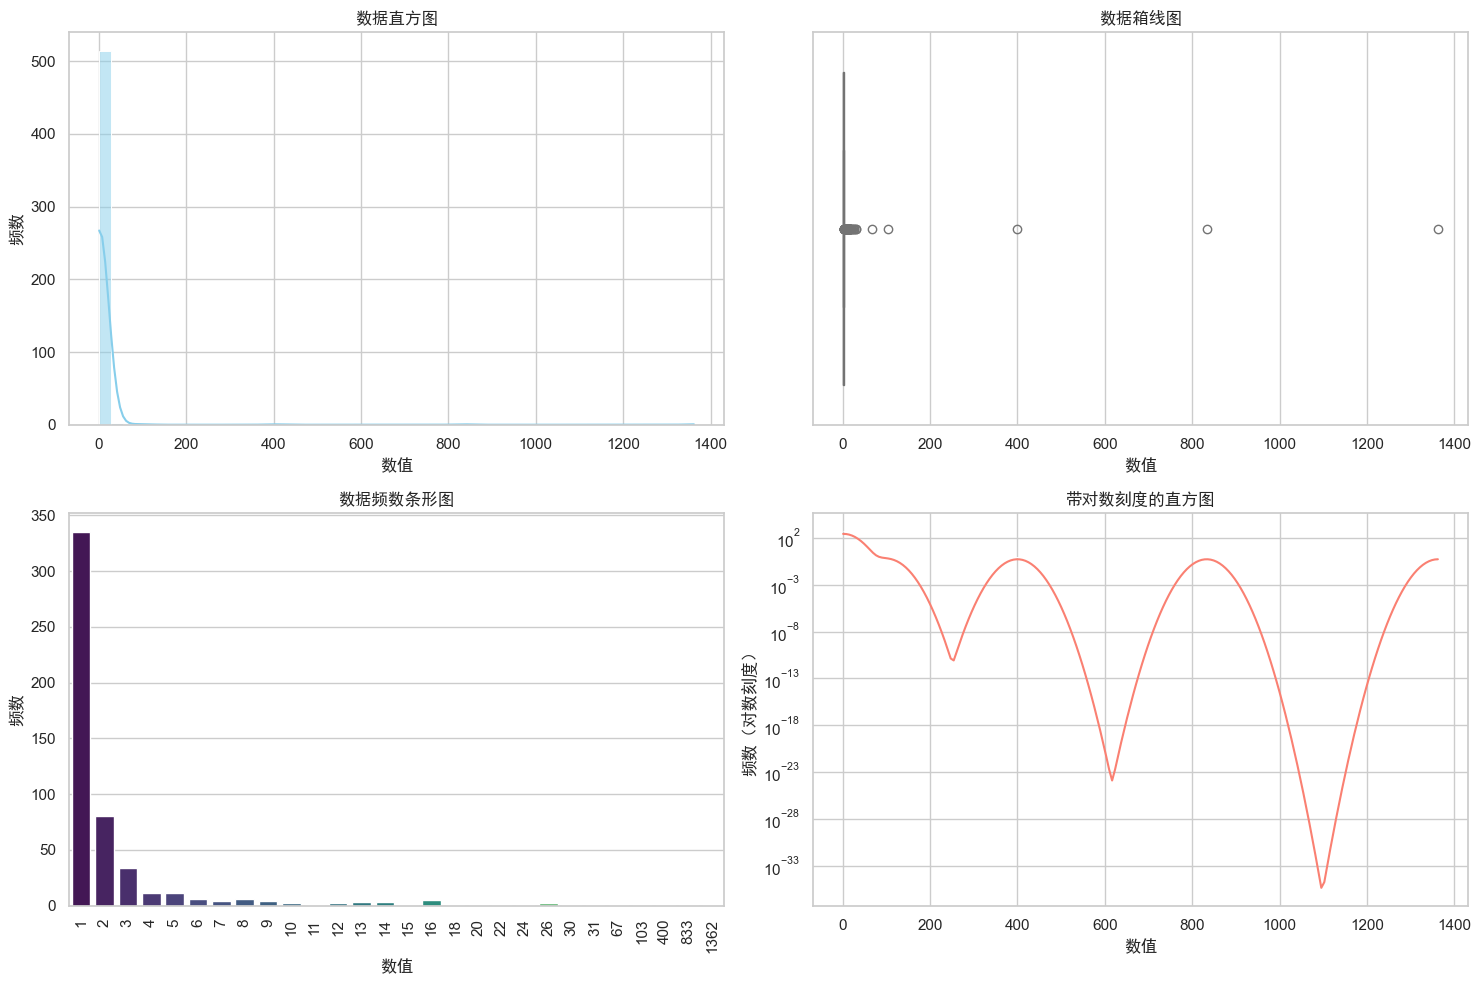

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import font_manager

font_path = '/usr/share/fonts/MyFonts/simhei.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

# 设置中文字体和解决负号显示问题
plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 查看数量分布情况
data = [len(item['项目prs']) for item in pr_data.values()]


# 计算基本统计量
count = len(data)
unique_counts = Counter(data)
mean = sum(data) / count
median = sorted(data)[count // 2]
mode = unique_counts.most_common(1)[0][0]
min_val = min(data)
max_val = max(data)

print(f"数据总数: {count}")
print(f"最小值: {min_val}")
print(f"最大值: {max_val}")
print(f"平均值: {mean:.2f}")
print(f"中位数: {median}")
print(f"众数: {mode}")

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个图形和多个子图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 直方图
sns.histplot(data, bins=50, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('数据直方图', fontproperties=font_prop)
axes[0, 0].set_xlabel('数值', fontproperties=font_prop)
axes[0, 0].set_ylabel('频数', fontproperties=font_prop)

# 2. 箱线图（处理异常值）
sns.boxplot(x=data, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('数据箱线图', fontproperties=font_prop)
axes[0, 1].set_xlabel('数值', fontproperties=font_prop)

# 3. 条形图（显示各个数值的频数）
count_series = Counter(data)
sorted_counts = dict(sorted(count_series.items()))
sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('数据频数条形图', fontproperties=font_prop)
axes[1, 0].set_xlabel('数值', fontproperties=font_prop)
axes[1, 0].set_ylabel('频数', fontproperties=font_prop)
axes[1, 0].tick_params(axis='x', rotation=90)

# 4. 带有对数刻度的直方图，以更好地展示包含极端值的数据
sns.histplot(data, bins=50, ax=axes[1, 1], kde=True, color='salmon', log_scale=(False, True))
axes[1, 1].set_title('带对数刻度的直方图', fontproperties=font_prop)
axes[1, 1].set_xlabel('数值', fontproperties=font_prop)
axes[1, 1].set_ylabel('频数（对数刻度）', fontproperties=font_prop)

plt.tight_layout()
plt.show()

In [11]:
import json
from  data_process.llm_process_3 import llm_restructure_pr_body

dataset_dir = "data/restructed_pull_request.json"
with open(dataset_dir, "r") as dataset_dir:
    data = json.load(dataset_dir)

for project_name, project_info in data.items():
    has_test_plan_num = 0
    for pr_info in project_info['项目prs']:
        llm_pr_body = llm_restructure_pr_body(pr_info['pr的文本描述'])

        restructured_pr_body = llm_pr_body.strip('```json').strip('```')
        # print(restructured_pr_body)

        json_content = json.loads(restructured_pr_body)

        if json_content["Test plan"] != "None":
            pr_info["测试计划"] = json_content["Test plan"]
            has_test_plan_num += 1
        else:
            pr_info["测试计划"] = "None"
    project_info["存在测试计划的PR数量"] = has_test_plan_num
    print(f"项目 {project_name} 中共有： {len(project_info['项目prs'])} PR， 存在测试计划的PR数量：{has_test_plan_num}")
        
with open('data/llm_restructed_pull_request.json', 'w') as json_file:
    json.dump(data, json_file, indent=4, ensure_ascii=False)


In [1]:
# llm第一过滤后数据分析
import json

with open('data/llm_restructed_pull_request.json', 'r') as file:
    pr_data = json.load(file)


In [11]:

for pr in pr_data['bentoml/BentoML']['项目prs']:
    if pr['测试计划'] != 'None':
        print(pr['测试计划'])
        break
    

Added tests and cases. MLflow-specific runner tests per flavor will be added once every MLflow-supported flavor is fully supported in BentoML.


In [7]:
num = 0
for project_name, project_info in pr_data.items():
    if '存在测试计划的PR数量' in project_info:
        if project_info['存在测试计划的PR数量'] > 0 :
            num += 1
    else:
        print(project_name)
print(f"测试计划大于0的PR数量为：{num}")

测试计划大于0的PR数量为：210


In [21]:
data = []
for project_name, project_info in pr_data.items():
    if '存在测试计划的PR数量' in project_info and project_info['存在测试计划的PR数量'] > 1:
        data.append(project_info['存在测试计划的PR数量'])

In [16]:
print(pr_data['bentoml/BentoML']['存在测试计划的PR数量'])
print(len(pr_data['bentoml/BentoML']['项目prs']))

15
1362


数据总数: 72
最小值: 2
最大值: 677
平均值: 15.32
中位数: 3
众数: 2


/tmp/ipykernel_15706/780434413.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), ax=axes[1, 0], palette='viridis')


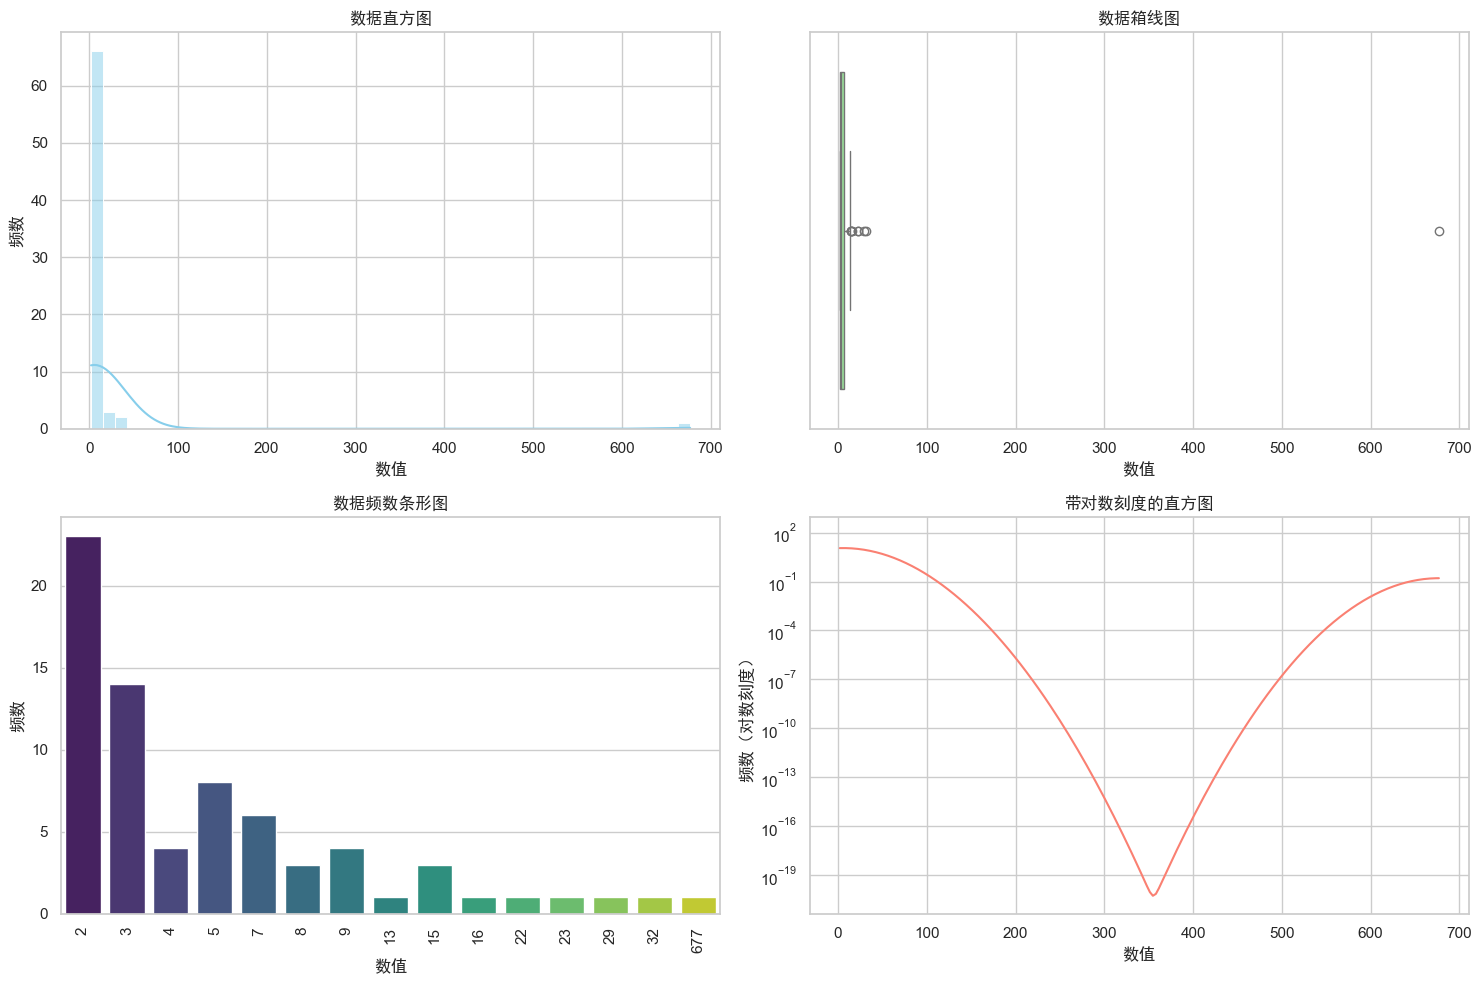

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import font_manager

font_path = '/usr/share/fonts/MyFonts/simhei.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

# 设置中文字体和解决负号显示问题
plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 查看数量分布情况
# data = [len(item['项目prs']) for item in pr_data.values()]


# 计算基本统计量
count = len(data)
unique_counts = Counter(data)
mean = sum(data) / count
median = sorted(data)[count // 2]
mode = unique_counts.most_common(1)[0][0]
min_val = min(data)
max_val = max(data)

print(f"数据总数: {count}")
print(f"最小值: {min_val}")
print(f"最大值: {max_val}")
print(f"平均值: {mean:.2f}")
print(f"中位数: {median}")
print(f"众数: {mode}")

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个图形和多个子图
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 直方图
sns.histplot(data, bins=50, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('数据直方图', fontproperties=font_prop)
axes[0, 0].set_xlabel('数值', fontproperties=font_prop)
axes[0, 0].set_ylabel('频数', fontproperties=font_prop)

# 2. 箱线图（处理异常值）
sns.boxplot(x=data, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('数据箱线图', fontproperties=font_prop)
axes[0, 1].set_xlabel('数值', fontproperties=font_prop)

# 3. 条形图（显示各个数值的频数）
count_series = Counter(data)
sorted_counts = dict(sorted(count_series.items()))
sns.barplot(x=list(sorted_counts.keys()), y=list(sorted_counts.values()), ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('数据频数条形图', fontproperties=font_prop)
axes[1, 0].set_xlabel('数值', fontproperties=font_prop)
axes[1, 0].set_ylabel('频数', fontproperties=font_prop)
axes[1, 0].tick_params(axis='x', rotation=90)

# 4. 带有对数刻度的直方图，以更好地展示包含极端值的数据
sns.histplot(data, bins=50, ax=axes[1, 1], kde=True, color='salmon', log_scale=(False, True))
axes[1, 1].set_title('带对数刻度的直方图', fontproperties=font_prop)
axes[1, 1].set_xlabel('数值', fontproperties=font_prop)
axes[1, 1].set_ylabel('频数（对数刻度）', fontproperties=font_prop)

plt.tight_layout()
plt.show()

In [4]:
import json 
import os

os.chdir('/home/veteran/projects/multiAgent/TestPlanAgent/')

with open('data/test_plan_list_zmh.json') as f:
    test_plan = json.load(f)

sorted_test_plan = dict(sorted(test_plan.items(), key=lambda item: len(item[1]), reverse=True))

with open('data/sorted_test_plan_list_zmh.json', 'w') as json_file:
    json.dump(sorted_test_plan, json_file, indent=4, ensure_ascii=False)
